# Exploratory Analysis

In [1]:
# Import dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load files for analysis
results_df = pd.read_csv('../Resources/Dataset/results.csv')
races_df = pd.read_csv('../Resources/Dataset/races.csv')
laptimes_df = pd.read_csv('../Resources/Dataset/lap_times.csv')

# Join Tables

In [3]:
# Filter only fifth lap race position. 
fifthlap_df = laptimes_df.loc[laptimes_df['lap']==5]

In [4]:
# Rename position column to fifthlap_position.
fifthlap_df = fifthlap_df.rename(columns={'position': 'fifthlap_position'})

In [5]:
# Rename position column to ending_position in results_df.
results_df = results_df.rename(columns={'position': 'ending_position'})

In [6]:
# Merge results_df with races_df on raceId.
results_df = (results_df.merge(races_df, left_on='raceId', right_on='raceId')
              .reindex(columns=['raceId', 'driverId', 'constructorId', 'ending_position', 'year', 'name']))
print(results_df.shape)
results_df.head()

(25040, 6)


,raceId,driverId,constructorId,ending_position,year,name
0,18,1,1,1,2008,Australian Grand Prix
1,18,2,2,2,2008,Australian Grand Prix
2,18,3,3,3,2008,Australian Grand Prix
3,18,4,4,4,2008,Australian Grand Prix
4,18,5,1,5,2008,Australian Grand Prix


In [7]:
# Merge results_df with firstlap_df on raceId and driverId.
results_df = (results_df.merge(fifthlap_df, how='right', left_on=['raceId','driverId'], right_on=['raceId','driverId'])
              .reindex(columns=['raceId', 'driverId', 'constructorId', 'ending_position',
                                'year', 'name', 'lap', 'fifthlap_position']))
print(results_df.shape)
results_df.head()

(9169, 8)


,raceId,driverId,constructorId,ending_position,year,name,lap,fifthlap_position
0,841,20,9,1,2011,Australian Grand Prix,5,1
1,841,1,1,2,2011,Australian Grand Prix,5,2
2,841,17,9,5,2011,Australian Grand Prix,5,3
3,841,808,4,3,2011,Australian Grand Prix,5,4
4,841,13,6,7,2011,Australian Grand Prix,5,5


In [8]:
# Replace all \\N in ending_position column to 0.
results_df['ending_position'] = results_df['ending_position'].replace({'\\N':0})

# Convert ending_position from object to numeric.
results_df['ending_position'] = pd.to_numeric(results_df['ending_position'])

In [9]:
# Consider fifthlap_position == 1.
results_df['fifthlap_position']= results_df ['fifthlap_position'].loc[results_df['fifthlap_position']==1]
results_df.dropna().reset_index()

,index,raceId,driverId,constructorId,ending_position,year,name,lap,fifthlap_position
0,0,841,20,9,1,2011,Australian Grand Prix,5,1.0
1,22,842,20,9,1,2011,Malaysian Grand Prix,5,1.0
2,46,843,18,1,4,2011,Chinese Grand Prix,5,1.0
3,70,844,20,9,1,2011,Turkish Grand Prix,5,1.0
4,93,845,4,6,5,2011,Spanish Grand Prix,5,1.0
...,...,...,...,...,...,...,...,...,...
453,9072,1047,830,9,1,2020,Abu Dhabi Grand Prix,5,1.0
454,9092,1052,830,9,2,2021,Bahrain Grand Prix,5,1.0
455,9111,1053,830,9,1,2021,Emilia Romagna Grand Prix,5,1.0
456,9130,1054,822,131,3,2021,Portuguese Grand Prix,5,1.0


In [10]:
# Define a function for ending_position. 
def positions(ending_position,fifthlap_position):
    if ((ending_position == 1) and (fifthlap_position == 1)):
        return 'Winner'
    elif ((ending_position == 2) and (fifthlap_position == 1)):
        return 'Podium'
    elif ((ending_position == 3) and (fifthlap_position == 1)):
        return 'Podium'
    else:
        return 'No Podium'
results_df['fifthlap_results'] = results_df.apply(lambda x: positions(x['ending_position'], x['fifthlap_position']),axis=1)

In [11]:
# Drop the Nan values.
lap_results = results_df.dropna().reset_index()

In [12]:
# Lap results are saved as a fifthlap_results.csv file.
lap_results.to_csv('../Resources/Dataset/fifthlap_results.csv')

In [13]:
# Count the fifthlap_results values.
fifth_lap_results = lap_results['fifthlap_results'].value_counts()
fifth_lap_results

Winner       265
No Podium    102
Podium        91
Name: fifthlap_results, dtype: int64

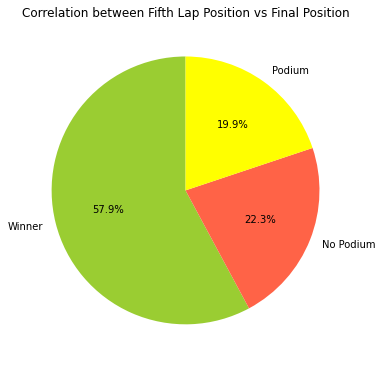

In [14]:
# Plot a pie chart
x = ['Winner', 'No Podium', 'Podium']
y = fifth_lap_results
colors = ['yellowgreen', 'tomato', 'yellow']
plt.subplots(figsize=(6, 8))
plt.pie(y, labels=x, startangle=90, colors=colors, autopct='%.1f%%')
plt.title('Correlation between Fifth Lap Position vs Final Position')
plt.show()